# 1 SDS on AU 100 2x4x4 LAMMPS

In [1]:
## preferred installation method for netcdf on NEMO locally:
# module load mpi/openmpi/2.1-gnu-5.2
# module load {...}
# export CPPFLAGS="${CPPFLAGS} -I${MPI_INC_DIR}"
# export LDFLAGS="${LDFLAGS} -L${MPI_LIB_DIR}"
# pip install --user netCDF4

## alternatively:
# pip install --user --global-option=build_ext --global-option="-L${MPI_INC_DIR}" netCDF4

In [2]:
%lsmagic # notebook commands

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

In [4]:
# list environment variables, like bash's 'printenv'
%env

{'BASH_FUNC_module()': '() {  eval $(/opt/bwhpc/common/admin/modules/module-wrapper/modulecmd bash $*)\n}',
 'CC': 'gcc',
 'CFLAGS': '-O3 -fPIC',
 'CLICOLOR': '1',
 'CMAKE_BIN_DIR': '/opt/bwhpc/common/devel/cmake/3.9.0/bin',
 'CMAKE_DOC_DIR': '/opt/bwhpc/common/devel/cmake/3.9.0/doc',
 'CMAKE_HOME': '/opt/bwhpc/common/devel/cmake/3.9.0',
 'CMAKE_MAN_DIR': '/opt/bwhpc/common/devel/cmake/3.9.0/man',
 'CMAKE_VERSION': '3.9.0',
 'CPATH': '/work/ws/nemo/fr_lp1029-IMTEK_SIMULATION-0/local_modules/lammps/16Mar18-gnu-5.2-openmpi-2.1/include:/opt/bwhpc/common/compiler/intel/2017.7.259/compilers_and_libraries/linux/mkl/include',
 'CPPFLAGS': '-I/work/ws/nemo/fr_lp1029-IMTEK_SIMULATION-0/local_modules/lammps/16Mar18-gnu-5.2-openmpi-2.1/include',
 'CXX': 'g++',
 'CXXFLAGS': '-O3 -fPIC',
 'C_INCLUDE_PATH': '/work/ws/nemo/fr_lp1029-IMTEK_SIMULATION-0/local_modules/libxc/2.2.0/include',
 'DISPLAY': 'localhost:21.0',
 'ENV': '/work/ws/nemo/fr_lp1029-IMTEK_SIMULATION-0/local_Nov17',
 'F77': 'gfortran',

In [3]:
%load_ext memory_profiler

In [4]:
# for some reason, nglview sometimes changes into some temporary directory
# therefore ALWAY use absolute filenames and paths
# %cd /work/ws/nemo/fr_jh1130-201708-0/jobs/lmplab/sds/201806/1_SDS_on_AU_100_1x4x4/

In [5]:
import os

In [6]:
absolute_prefix = os.getcwd()

In [7]:
os.sep

'/'

In [8]:
import numpy as np
import pandas as pd # 
import ase
import ase.io
from ase.io import NetCDFTrajectory
from ase.io import read
from ase.io import proteindatabank
from ase.io.trajectory import Trajectory
from ase.visualize import view
import parmed as pmd
import netCDF4
import nglview as nv
import matplotlib.pyplot as plt

In [100]:
import ipywidgetss

In [9]:
%matplotlib inline

In [10]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure titlex

plt.rcParams["figure.figsize"] = (11,7)

## Evaluation of text files with pandas

In [11]:
dt = 2e-15 # 2 fs timestep

### Minimization

In [12]:
%ls *minimization*

01_minimization_thermo.out  1_SDS_on_AU_100_2x4x4_01_minimization.log
02_minimization_thermo.out


In [13]:
!./extract_thermo.sh 1_SDS_on_AU_100_2x4x4_01_minimization.log 01_minimization_thermo.out

In [14]:
minimization_thermo_file = absolute_prefix + os.sep + '01_minimization_thermo.out'

In [15]:
minimization_thermo_pd = pd.read_csv(minimization_thermo_file,delim_whitespace=True)

In [234]:
minimization_thermo_pd.set_index("Step",inplace=True)

In [235]:
minimization_thermo_pd

,TotEng,KinEng,PotEng,Temp,Press,Enthalpy,E_bond,E_angle,E_dihed,E_impro,E_pair,E_vdwl,E_coul,E_long,E_tail,Volume,E_intramolecular
Step,,,,,,,,,,,,,,,,,
0,3.770277e+08,0,3.770277e+08,0,1.197962e+10,1.885537e+09,96.694718,56.941506,8.857407,0,3.770276e+08,3.770285e+08,9033.2821,-9952.4123,0,8634.3385,162.493631
10,1.541319e+04,0,1.541319e+04,0,8.088794e+05,1.172697e+05,88.142120,55.899323,8.859497,0,1.526029e+04,1.618447e+04,9028.9587,-9953.1336,0,8634.3385,152.900940
20,-4.765068e+03,0,-4.765068e+03,0,7.861239e+04,5.134038e+03,14.671445,49.968829,8.811540,0,-4.838520e+03,-3.774163e+03,8919.9742,-9984.3308,0,8634.3385,73.451814
30,-5.029707e+03,0,-5.029707e+03,0,6.226629e+04,2.811050e+03,14.749641,47.816204,8.901340,0,-5.101174e+03,-3.898383e+03,8837.9813,-10040.7730,0,8634.3385,71.467185
40,-5.153158e+03,0,-5.153158e+03,0,5.913981e+04,2.293902e+03,17.129625,49.183880,8.969378,0,-5.228441e+03,-3.923049e+03,8767.7317,-10073.1240,0,8634.3385,75.282883
50,-5.307507e+03,0,-5.307507e+03,0,4.556182e+04,4.297718e+02,17.447562,50.767456,8.969807,0,-5.384692e+03,-4.026744e+03,8718.5870,-10076.5350,0,8634.3385,77.184825
60,-5.445525e+03,0,-5.445525e+03,0,3.549841e+04,-9.754603e+02,21.341406,53.373569,9.061394,0,-5.529301e+03,-4.067790e+03,8616.3585,-10077.8700,0,8634.3385,83.776369
70,-5.790441e+03,0,-5.790441e+03,0,1.770265e+04,-3.561270e+03,27.120838,55.044459,8.643649,0,-5.881250e+03,-4.308539e+03,8507.8155,-10080.5260,0,8634.3385,90.808946
80,-5.978006e+03,0,-5.978006e+03,0,6.802047e+03,-5.121472e+03,34.360121,57.703872,8.349216,0,-6.078420e+03,-4.420098e+03,8422.5615,-10080.8830,0,8634.3385,100.413209


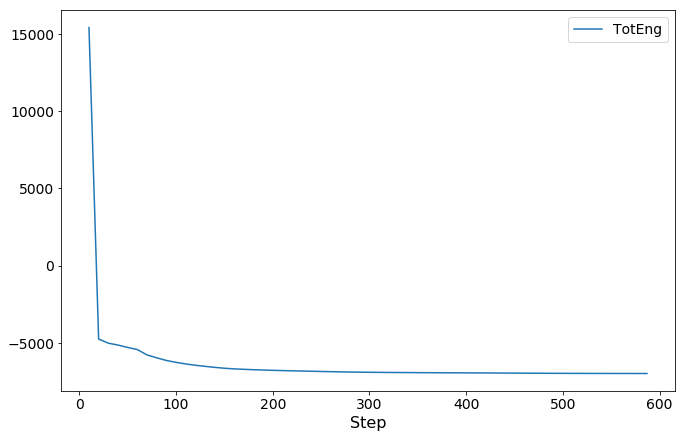

In [236]:
minimization_thermo_pd[["TotEng"]][1:].plot() # units?

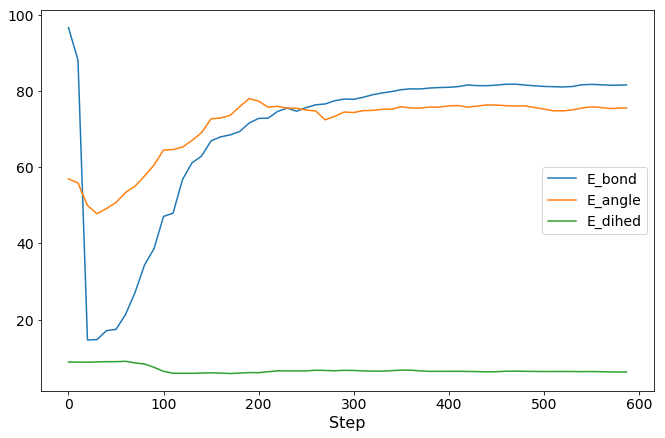

In [237]:
# intramolecular energy contributions
minimization_thermo_pd[["E_bond","E_angle","E_dihed"]].plot() # units?

In [238]:
# total intramolecular ("bonded") interactions:
minimization_thermo_pd["E_intramolecular"] = minimization_thermo_pd[["E_bond","E_angle","E_dihed"]].sum(axis=1)

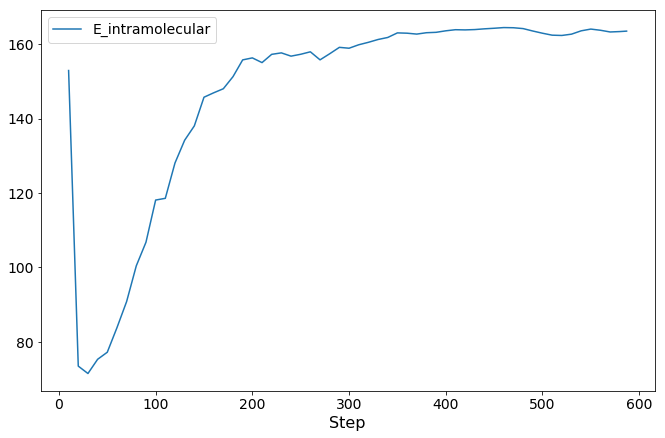

In [239]:
minimization_thermo_pd[["E_intramolecular"]][1:].plot()

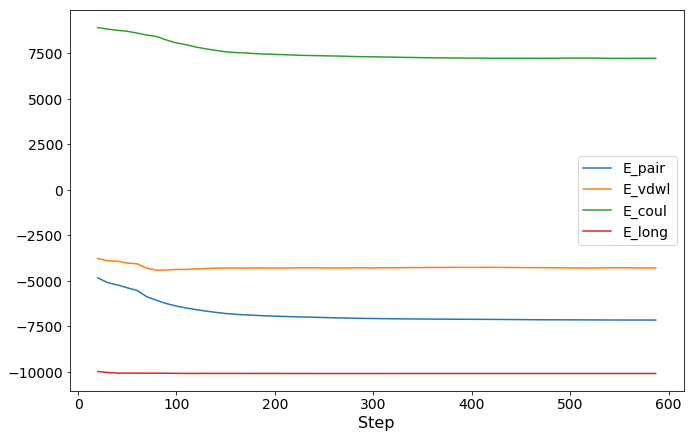

In [240]:
# intermolecular ("non-bonded") energy contribtutions
minimization_thermo_pd[["E_pair","E_vdwl","E_coul","E_long"]][2:].plot() # units?

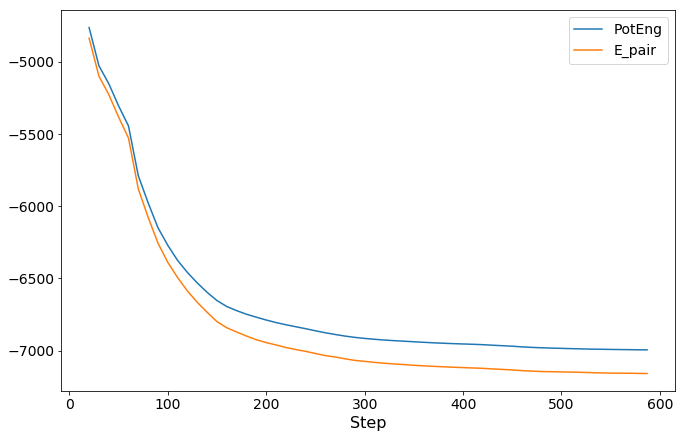

In [241]:
# The total energy decreases, but intramolecular energy increases during minimization:
minimization_thermo_pd[["PotEng","E_pair"]][2:].plot()

In [242]:
# double-check: total potential energy of system minus non-bonded energy (LJ & Coulomb) 
# should correspond to intramolecular energy:
intramolecularEnergyValidation = minimization_thermo_pd["PotEng"] - minimization_thermo_pd["E_pair"]

In [243]:
intramolecularEnergyValidationDiff = (intramolecularEnergyValidation - minimization_thermo_pd["E_intramolecular"])

In [244]:
intramolecularEnergyValidationDiff.max()

9.0599999566620681e-05

In [245]:
intramolecularEnergyValidationDiff.abs().max() / intramolecularEnergyValidation.min()

0.034891963026395689

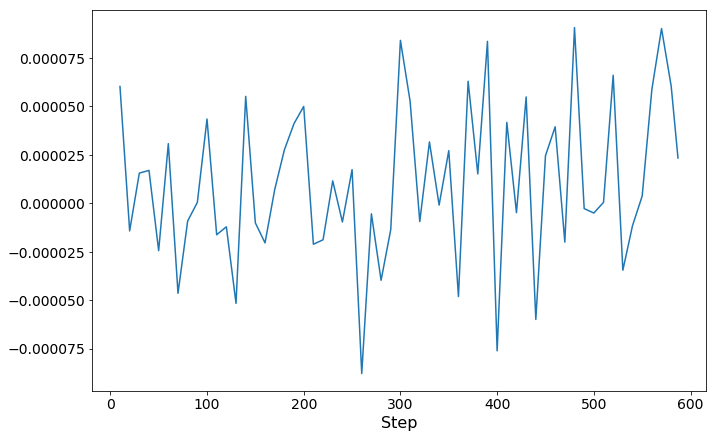

In [246]:
(intramolecularEnergyValidation - minimization_thermo_pd["E_intramolecular"])[1:].plot()
# obviously "equal" (up to a tiny fraction)

In [247]:
# automize the plotting of thermo output:
def makeThermoPlotsFromDataFrame(df, fig=None,
        time_label          = r'$\frac{\mathrm{Steps}}{2 \mathrm{fs}}$',
        temperature_label   = r'$\frac{T}{\mathrm{K}}$',
        pressure_label      = r'$\frac{P}{\mathrm{atm}}$',
        energy_label        = r'$\frac{E}{\mathrm{Kcal} \cdot \mathrm{mole}^{-1}}$'):
    
    rows = 3
    cols = 2
    if fig == None:
        fig = plt.figure(figsize=(cols*8,rows*5))
    
    #pos = rows*100+cols*10+p+1
    def sublpotPosition(rows,cols):
        for p in range(0,rows*cols):
            yield rows*100+cols*10+p+1
     
    def addSubplot(df,fig,pos,title,xlabel,ylabel):
        #global p
        ax = fig.add_subplot(pos)
        df.plot(ax=ax) # taimed temperature
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
    
    pos = sublpotPosition(rows,cols)
    
    # sum up intramolecular contributions 
    df["E_intramolecular"] = df[["E_bond","E_angle","E_dihed"]].sum(axis=1)
    
    addSubplot(df[["Temp"]],
               fig, next(pos), "Temperature", time_label, temperature_label)
    addSubplot(df[["Press"]],
               fig, next(pos), "Pressure", time_label, pressure_label)
   
    # intramolecular contributions (without angle)
    addSubplot(df[["E_intramolecular","E_bond","E_angle","E_dihed"]],
               fig, next(pos), "Intramolecular energies", time_label, energy_label)
    # intermolecular ("non-bonded") energy contribtutions
    # E_pair is the sum of the three latter, just as E_intramolecular in the plot above
    addSubplot(df[["E_pair","E_vdwl","E_coul","E_long"]],
                fig, next(pos), "Intermolecular (non-bonded) energies", time_label, energy_label)
    
    # visualize the difference between total and non-bonded potential:
    addSubplot(df[["PotEng","E_pair"]],
               fig, next(pos), "Total potential and non-bonded potential", time_label, energy_label)
    
    addSubplot(df[["TotEng","KinEng","PotEng"]],
               fig, next(pos), "Total, kinetic and potential energies", time_label, energy_label)
    
    fig.tight_layout()

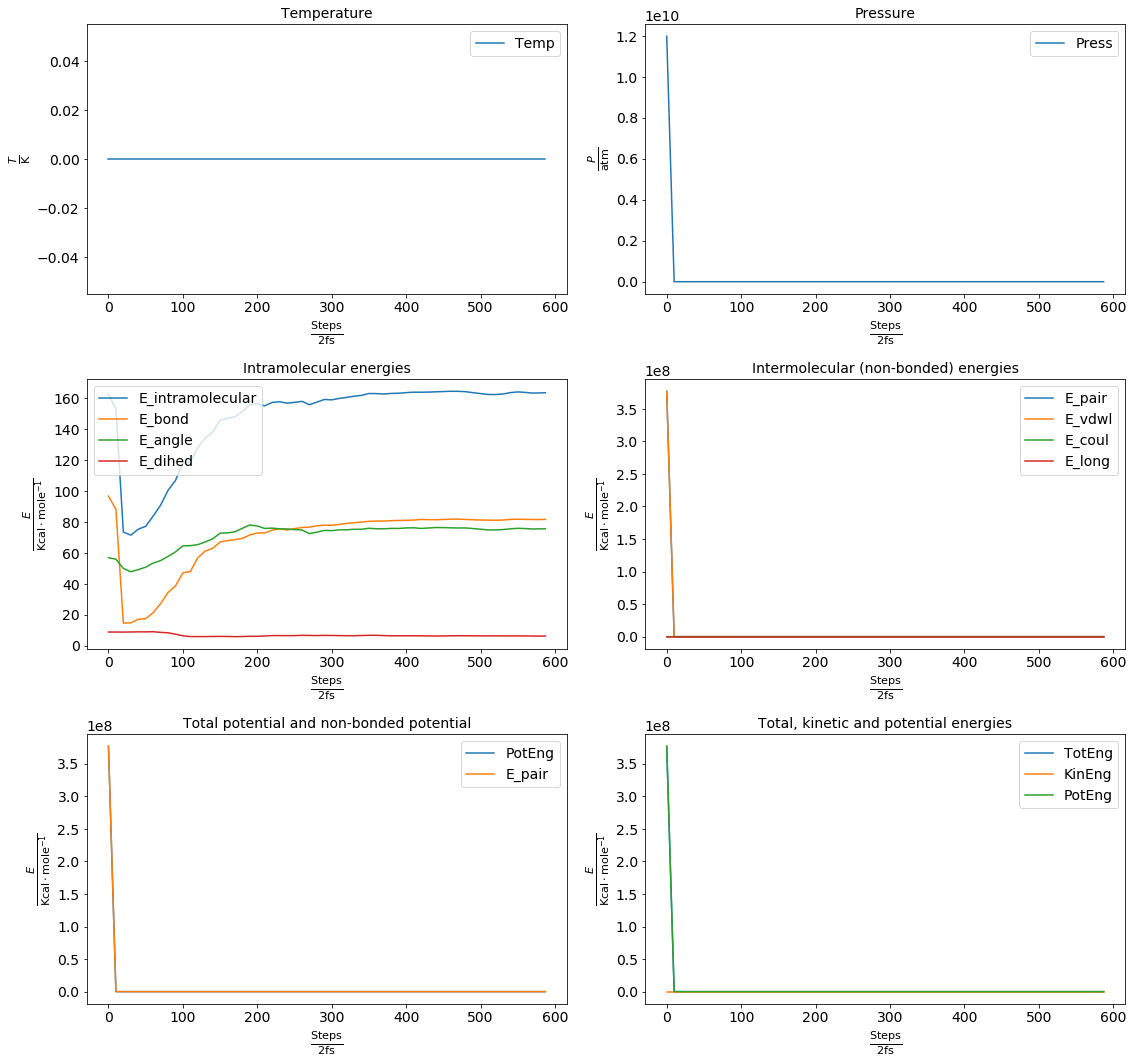

In [248]:
makeThermoPlotsFromDataFrame(minimization_thermo_pd)

/opt/bwhpc/common/devel/python/3.6.3.20171114/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


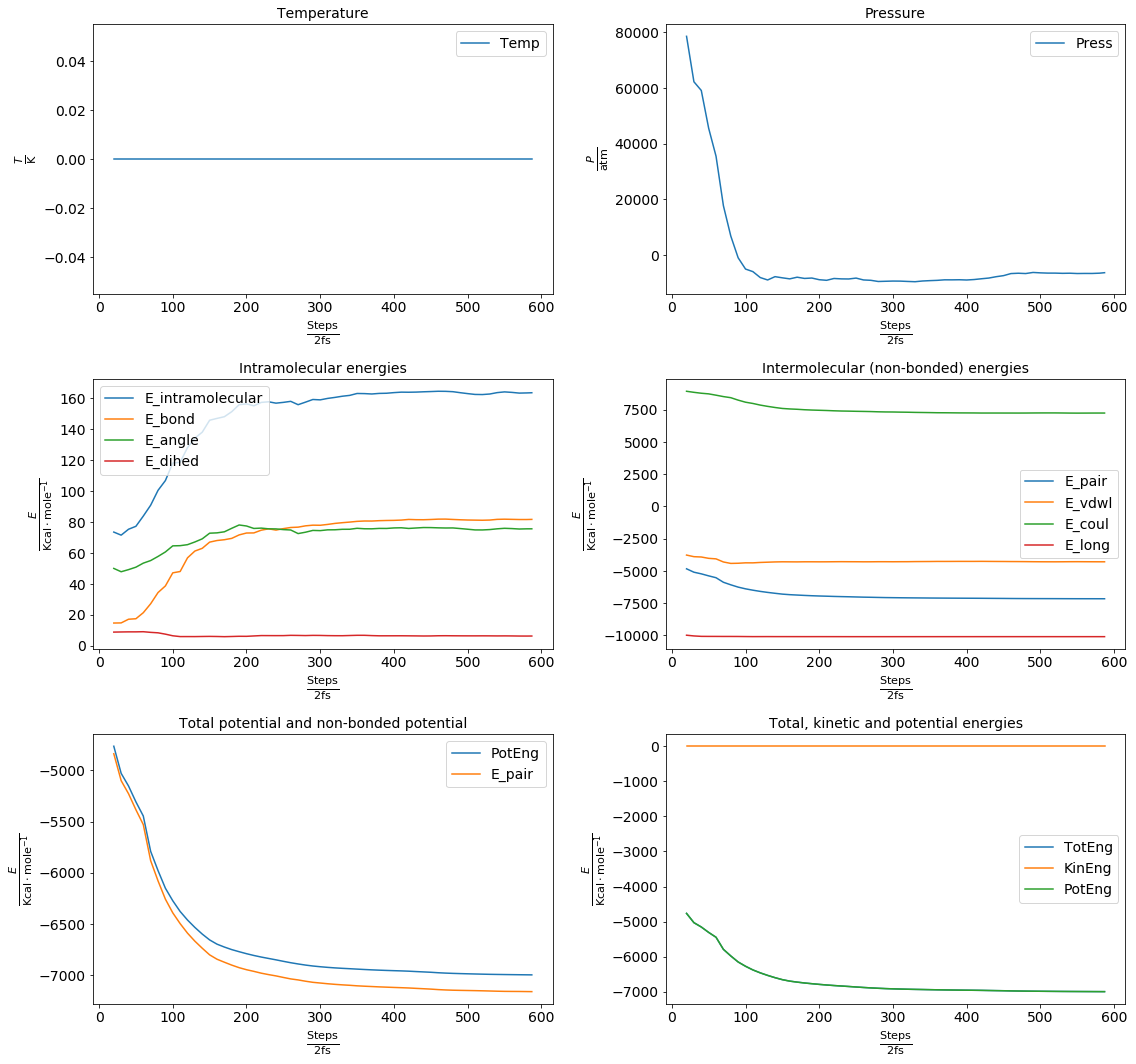

In [249]:
# descent to steep t the first few steps, excluded
makeThermoPlotsFromDataFrame(minimization_thermo_pd.iloc[2:])

### NVT equilibration

In [250]:
!./extract_thermo.sh 1_SDS_on_AU_100_2x4x4_02_nvtEquilibration.log 02_nvtEquilibration_thermo.out

In [251]:
nvtEquilibration_thermo_file = absolute_prefix + os.sep + '02_nvtEquilibration_thermo.out'

In [252]:
nvtEquilibration_thermo_pd = pd.read_csv(nvtEquilibration_thermo_file,delim_whitespace=True)

In [269]:
nvtEquilibration_thermo_pd.set_index("Step",inplace=True)

In [270]:
nvtEquilibration_thermo_pd

,TotEng,KinEng,PotEng,Temp,Press,Enthalpy,E_bond,E_angle,E_dihed,E_impro,E_pair,E_vdwl,E_coul,E_long,E_tail,Volume,E_intramolecular
Step,,,,,,,,,,,,,,,,,
0,-6790.4181,344.40298,-7134.8211,220.63666,-4476.26780,-7354.0830,0.264811,17.616622,6.282072,0,-7158.9846,-4294.5784,7232.0528,-10096.459,0,8634.3385,24.163504
10,-6510.1864,206.48063,-6716.6671,132.27875,-517.12146,-6575.3039,2.039723,29.950177,6.421224,0,-6755.0782,-4248.4534,7589.0932,-10095.718,0,8634.3385,38.411124
20,-6498.6821,185.10049,-6683.7826,118.58188,783.92512,-6399.9679,2.284188,27.088714,6.878745,0,-6720.0343,-4225.0640,7599.9554,-10094.926,0,8634.3385,36.251647
30,-6480.5473,173.41711,-6653.9644,111.09710,967.05160,-6358.7732,2.692841,27.543310,6.370934,0,-6690.5714,-4246.4855,7649.5327,-10093.619,0,8634.3385,36.607085
40,-6452.2111,188.87221,-6641.0833,120.99818,254.22123,-6420.1988,2.586770,26.688669,6.069266,0,-6676.4280,-4273.2504,7692.2202,-10095.398,0,8634.3385,35.344705
50,-6411.1591,217.85922,-6629.0183,139.56827,407.32874,-6359.8671,1.413510,28.393101,6.270840,0,-6665.0958,-4297.4882,7725.1633,-10092.771,0,8634.3385,36.077451
60,-6353.0084,246.96739,-6599.9758,158.21599,-142.94127,-6371.0080,3.387919,30.150164,7.446517,0,-6640.9604,-4305.9553,7761.0616,-10096.067,0,8634.3385,40.984600
70,-6276.4705,288.61348,-6565.0840,184.89594,551.03163,-6207.0830,2.565820,29.082327,7.603489,0,-6604.3356,-4309.7819,7799.6790,-10094.233,0,8634.3385,39.251636
80,-6177.1091,360.30021,-6537.4093,230.82098,1521.57640,-5985.5077,1.560500,27.601975,8.254221,0,-6574.8260,-4307.6607,7827.7720,-10094.937,0,8634.3385,37.416696


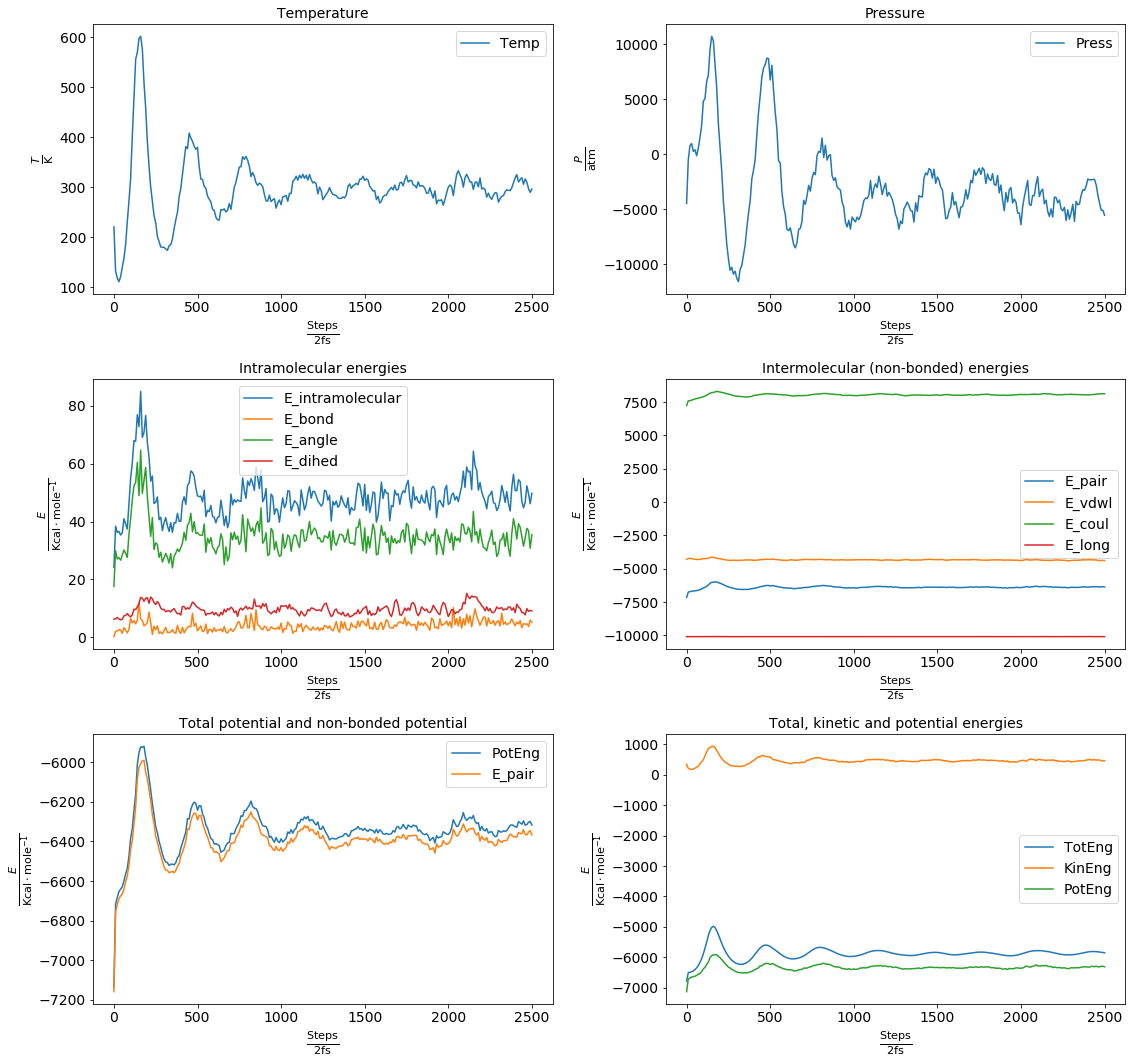

In [271]:
makeThermoPlotsFromDataFrame(nvtEquilibration_thermo_pd)

## NPT equilibration

In [255]:
!./extract_thermo.sh 1_SDS_on_AU_100_2x4x4_03_nptEquilibration.log 03_nptEquilibration_thermo.out

In [256]:
nptEquilibration_thermo_file = absolute_prefix + os.sep + '03_nptEquilibration_thermo.out'

In [257]:
nptEquilibration_thermo_pd = pd.read_csv(nptEquilibration_thermo_file,delim_whitespace=True)

In [264]:
nptEquilibration_thermo_pd.set_index("Step",inplace=True)

In [265]:
nptEquilibration_thermo_pd

,TotEng,KinEng,PotEng,Temp,Press,Enthalpy,E_bond,E_angle,E_dihed,E_impro,E_pair,E_vdwl,E_coul,E_long,E_tail,Volume,E_intramolecular
Step,,,,,,,,,,,,,,,,,
2500,-5855.3971,462.47081,-6317.8679,296.27506,-5551.244800,-6554.4263,5.172790,35.466505,9.158242,0,-6367.6654,-4392.4621,8119.9671,-10095.170,0,8634.3385,49.797537
2510,-5858.9878,473.92115,-6332.9090,303.61055,4346.135400,-5327.3345,7.123876,32.108747,8.768997,0,-6380.9106,-4325.7828,8036.4500,-10091.578,0,8387.8252,48.001620
2520,-5856.1129,471.05777,-6327.1707,301.77617,-2563.189400,-6176.4332,6.242582,37.837879,9.810672,0,-6381.0618,-4366.9657,8077.0630,-10091.159,0,8568.9551,53.891133
2530,-5863.7253,470.28681,-6334.0121,301.28226,1750.148300,-5648.2478,5.230364,34.580940,9.503832,0,-6383.3272,-4330.3433,8039.3830,-10092.367,0,8442.1136,49.315135
2540,-5860.8562,468.08156,-6328.9378,299.86950,-1015.477800,-5986.8455,4.993797,28.456679,9.727881,0,-6372.1161,-4353.4968,8075.2543,-10093.874,0,8507.2133,43.178357
2550,-5868.8018,455.45124,-6324.2531,291.77808,336.288310,-5827.2680,5.130294,33.825920,10.370152,0,-6373.5794,-4338.8056,8058.9388,-10093.713,0,8468.6491,49.326366
2560,-5865.2563,473.97092,-6339.2272,303.64243,704.364620,-5778.6078,6.148126,34.519190,10.510084,0,-6390.4046,-4333.7654,8038.0816,-10094.721,0,8435.0458,51.177400
2570,-5872.8944,480.55379,-6353.4482,307.85965,-1644.142300,-6076.0414,4.932282,30.538297,10.087976,0,-6399.0068,-4347.8615,8039.9934,-10091.139,0,8472.1769,45.558555
2580,-5875.9172,477.06441,-6352.9816,305.62423,1915.566100,-5641.5094,3.188837,32.844563,10.044608,0,-6399.0596,-4320.0872,8013.6539,-10092.626,0,8390.7148,46.078008


In [266]:
equilibration_pd = pd.concat([nvtEquilibration_thermo_pd,nptEquilibration_thermo_pd])

In [267]:
equilibration_pd.set_index("Step",inplace=True)

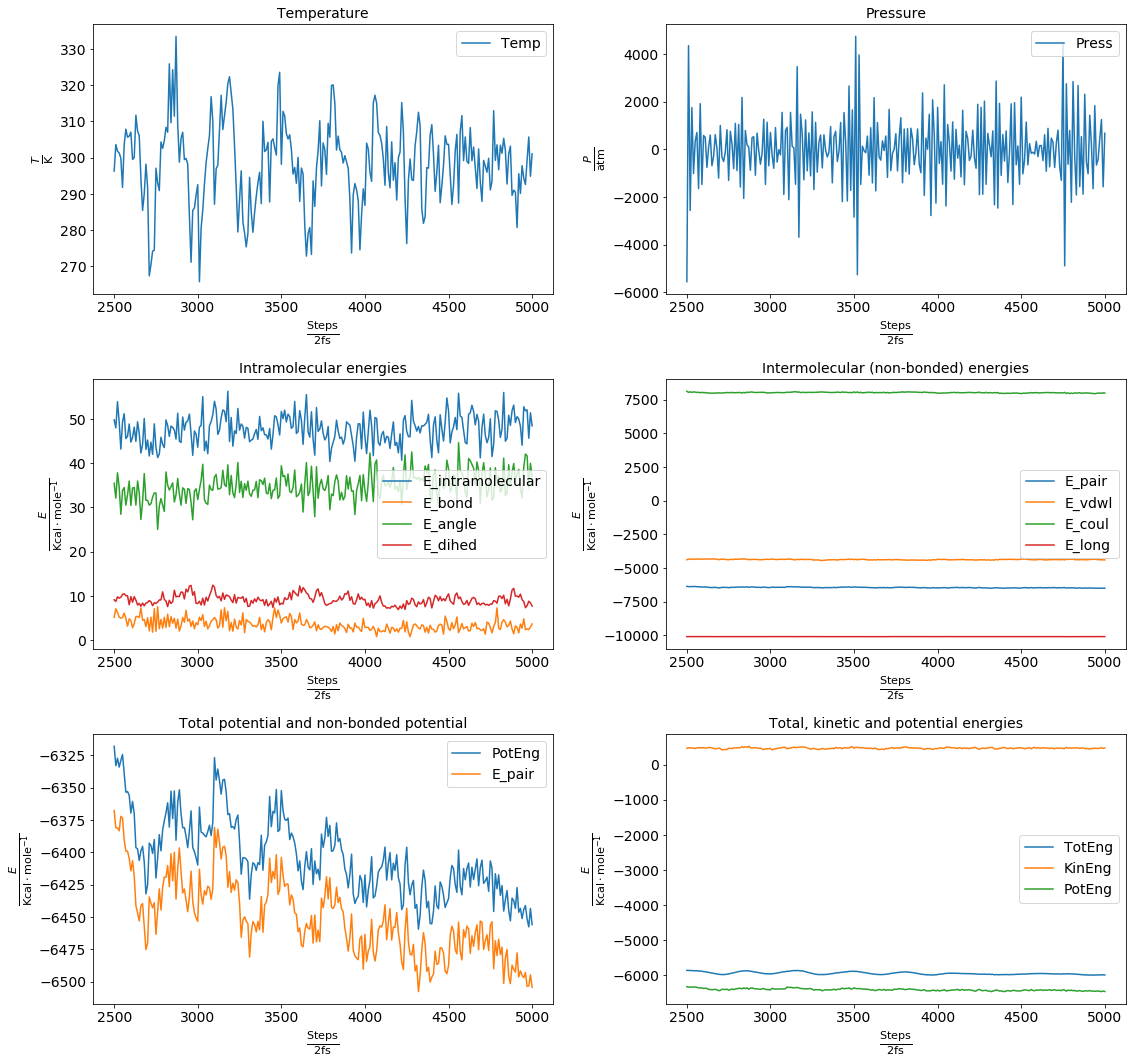

In [268]:
makeThermoPlotsFromDataFrame(nptEquilibration_thermo_pd)

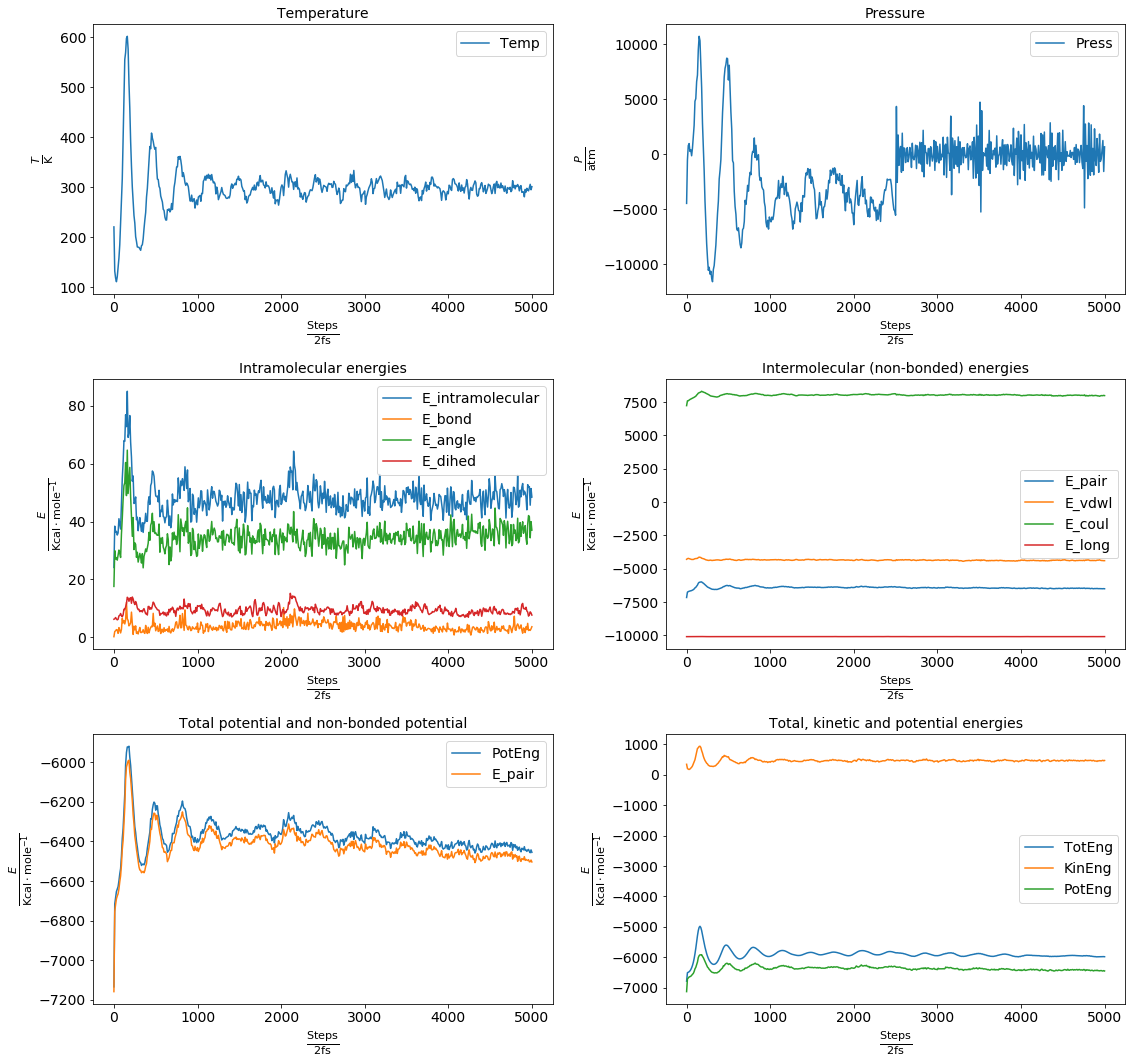

In [263]:
# show nvt and npt equilibration consecutively
makeThermoPlotsFromDataFrame(equilibration_pd)

## 10 ps NPT

In [274]:
!./extract_thermo.sh 1_SDS_on_AU_100_2x4x4_10ps_npt_01_nptProduction.log 05_10ps_nptProduction_thermo.out

In [275]:
nptProduction_thermo_file = absolute_prefix + os.sep + '05_10ps_nptProduction_thermo.out'

In [276]:
nptProduction_thermo_pd = pd.read_csv(nptProduction_thermo_file,delim_whitespace=True)

In [277]:
nptProduction_thermo_pd.set_index("Step",inplace=True)

In [278]:
nptProduction_thermo_pd

,TotEng,KinEng,PotEng,Temp,Press,Enthalpy,E_bond,E_angle,E_dihed,E_impro,E_pair,E_vdwl,E_coul,E_long,E_tail,Volume
Step,,,,,,,,,,,,,,,,
0,-5986.0143,469.88772,-6455.9020,301.02659,1027.268100,-5868.2960,3.697284,37.031456,7.719455,0,-6504.3502,-4396.0576,8047.1108,-10155.403,0,7857.5005
10,-5984.0029,449.69644,-6433.6993,288.09135,25.210240,-5981.1091,2.112664,35.731368,8.204838,0,-6479.7482,-4411.8200,8088.9847,-10156.913,0,7870.7413
20,-5984.3034,447.58531,-6431.8887,286.73888,-677.525250,-6062.2354,3.667732,30.324177,8.470466,0,-6474.3511,-4420.1021,8104.2369,-10158.486,0,7887.0541
30,-5981.3501,457.83329,-6439.1834,293.30410,92.444089,-5970.7382,3.202798,40.565382,8.594522,0,-6491.5461,-4432.1627,8098.3454,-10157.729,0,7871.1675
40,-5979.1258,458.71567,-6437.8415,293.86939,477.778580,-5924.1621,3.362926,35.524231,9.811094,0,-6486.5398,-4419.1831,8089.7419,-10157.099,0,7888.1254
50,-5972.1188,440.84489,-6412.9637,282.42074,59.421760,-5965.2728,4.151796,35.225657,10.225386,0,-6462.5666,-4399.5562,8091.4729,-10154.483,0,7899.8285
60,-5971.6135,453.33710,-6424.9506,290.42368,-989.765930,-6086.0661,3.122894,31.890301,10.456228,0,-6470.4200,-4386.1277,8073.4125,-10157.705,0,7928.9791
70,-5962.2689,462.98193,-6425.2509,296.60250,1080.858700,-5837.8187,2.173649,34.503570,11.273691,0,-6473.2018,-4361.8915,8044.9491,-10156.259,0,7894.9755
80,-5957.3447,486.93302,-6444.2777,311.94641,-124.848850,-5971.7441,4.605810,34.206514,11.159173,0,-6494.2492,-4373.9824,8036.9504,-10157.217,0,7908.3236


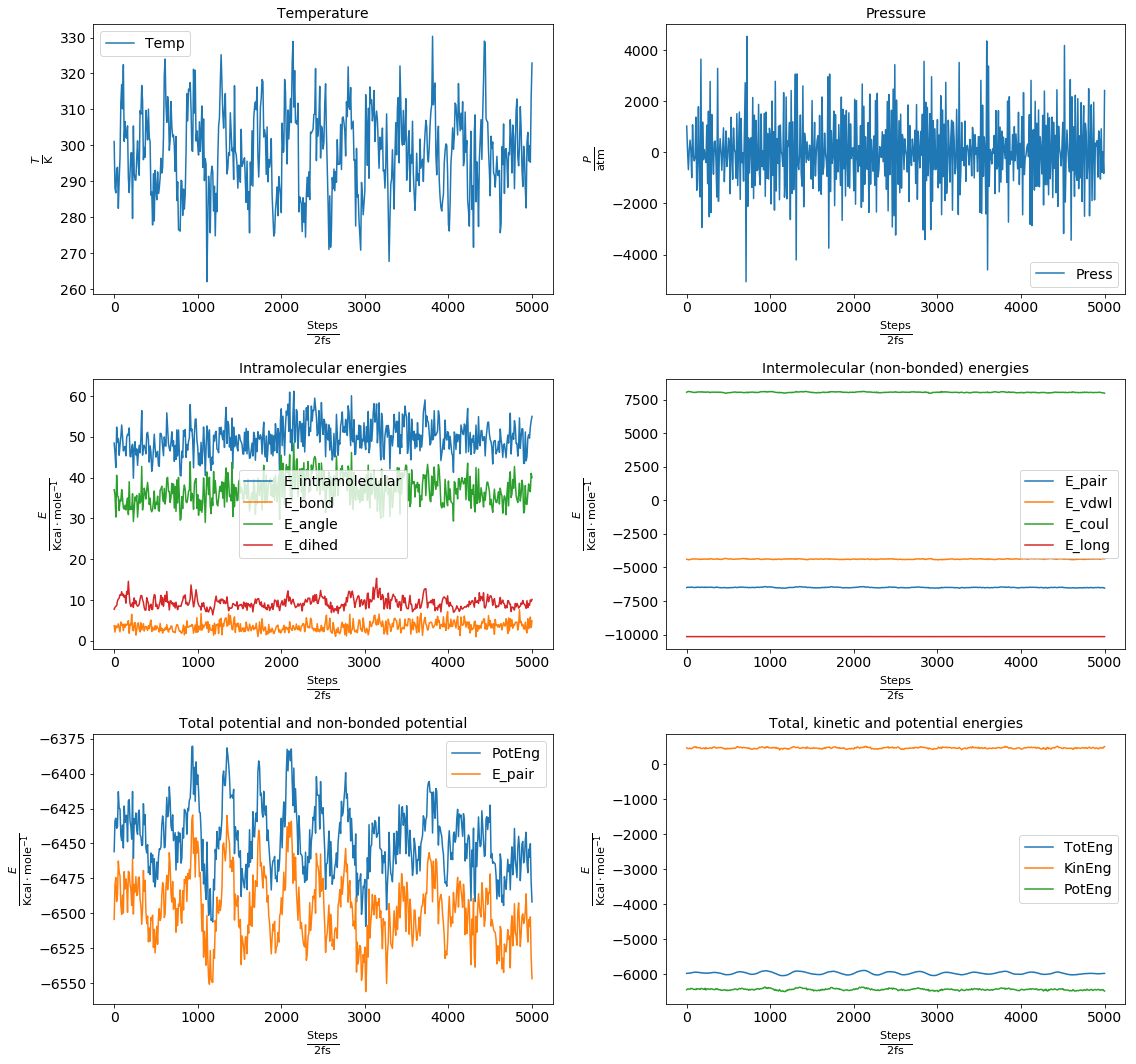

In [279]:
makeThermoPlotsFromDataFrame(nptProduction_thermo_pd)

## 100 ps NPT

In [281]:
!./extract_thermo.sh 1_SDS_on_AU_100_2x4x4_100ps_npt_01_nptProduction.log 05_100ps_nptProduction_thermo.out

In [284]:
nptProduction_100ps_thermo_file = absolute_prefix + os.sep + '05_100ps_nptProduction_thermo.out'
nptProduction_100ps_thermo_pd = pd.read_csv(nptProduction_100ps_thermo_file,delim_whitespace=True)
nptProduction_100ps_thermo_pd.set_index("Step",inplace=True)

/opt/bwhpc/common/devel/python/3.6.3.20171114/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


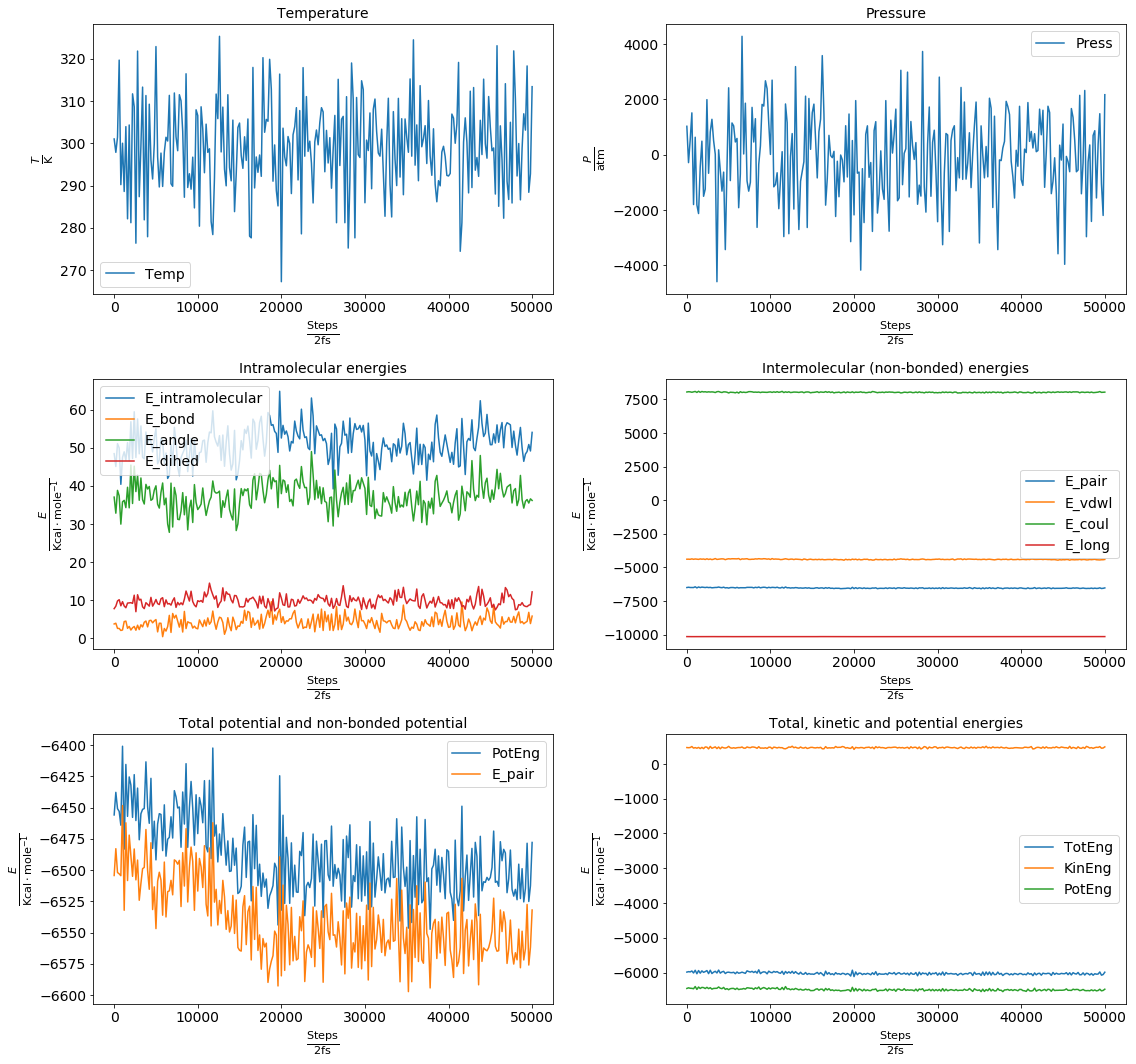

In [291]:
makeThermoPlotsFromDataFrame(nptProduction_100ps_thermo_pd.iloc[::20]) # only every 20th data point

# 1 ns

In [313]:
!./extract_thermo.sh 1_SDS_on_AU_100_2x4x4_1ns_npt_01_nptProduction.log 05_1ns_nptProduction_thermo.out

In [314]:
nptProduction_1ns_thermo_file = absolute_prefix + os.sep + '05_1ns_nptProduction_thermo.out'
nptProduction_1ns_thermo_pd = pd.read_csv(nptProduction_1ns_thermo_file,delim_whitespace=True)
nptProduction_1ns_thermo_pd.set_index("Step",inplace=True)

/opt/bwhpc/common/devel/python/3.6.3.20171114/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


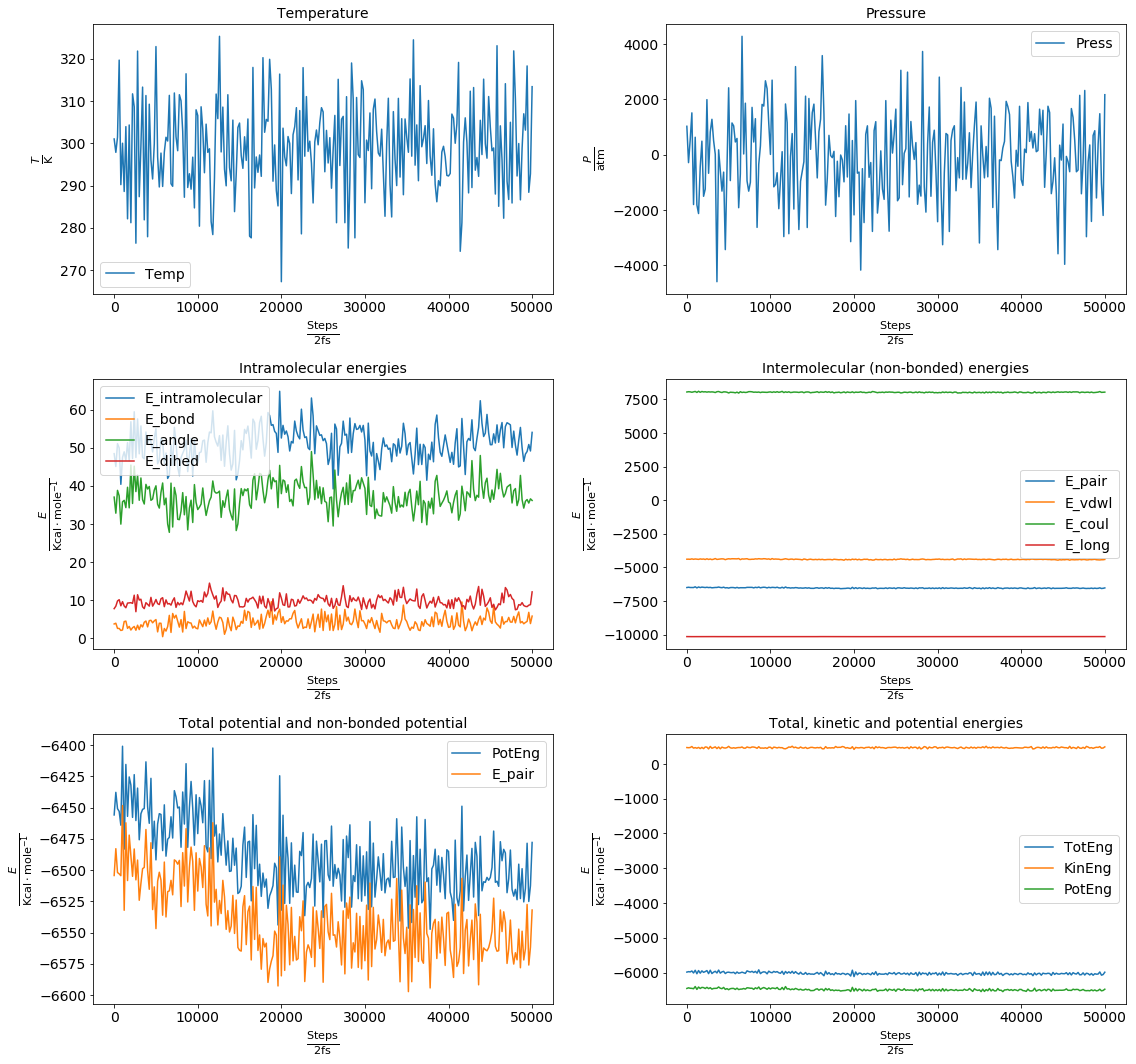

In [315]:
makeThermoPlotsFromDataFrame(nptProduction_100ps_thermo_pd.iloc[::20]) # only every 20th data point

## trajectory visualization with ASE and ParmEd

In [316]:
pdb_file_initial_config = absolute_prefix + os.sep + '1_SDS_on_AU_100_2x4x4_psfgen_ctrl.pdb'

lmp_files = { 'initial':         '1_SDS_on_AU_100_2x4x4_psfgen.data',
              'minimized':       '1_SDS_on_AU_100_2x4x4_minimized.lammps',
              'nvtEquilibrated': '1_SDS_on_AU_100_2x4x4_nvtEquilibrated.lammps',
              'nptEquilibrated': '1_SDS_on_AU_100_2x4x4_nptEquilibrated.lammps',
              'npt10ps':         '1_SDS_on_AU_100_2x4x4_10ps_npt_final_config.lammps',
              'npt100ps':        '1_SDS_on_AU_100_2x4x4_100ps_npt_final_config.lammps',
              'npt1ns':          '1_SDS_on_AU_100_2x4x4_1ns_npt_final_config.lammps' }

lmp_dumps = { 
              'nvtEquilibration': '1_SDS_on_AU_100_2x4x4_nvtEquilibration.dump',
              'nptEquilibration': '1_SDS_on_AU_100_2x4x4_nptEquilibration.dump',
              'npt10ps':          '1_SDS_on_AU_100_2x4x4_10ps_npt_nptProduction.dump',
              'npt100ps':         '1_SDS_on_AU_100_2x4x4_100ps_npt_nptProduction.dump',
              'npt1ns':           '1_SDS_on_AU_100_2x4x4_1ns_npt_nptProduction.dump' }

In [60]:
# ASE by default infers elements from LAMMPS atom types, in our case they are unrelated
# During preprocessing, our system went through several formats, one of them the 
# archaic .pdb format. Although ASE offers a pdb reader, it fails on our system.

# On the other hand, ParmEd is able to read .pdb and infer elements more or less accurately,
# but cannot process netCDF. Thus we combine both:
struct_pdb_pmd = pmd.read_PDB(pdb_file_initial_config)

In [61]:
resnames = np.unique([r.name for r in struct_pdb_pmd.residues])

In [62]:
resnames # residues in system

array(['AUM', 'HOH', 'ION', 'SDS'],
      dtype='<U3')

In [63]:
water = [ a for a in struct_pdb_pmd.atoms if a.residue.name == 'HOH' ] # water

In [64]:
water_indices = [ a.number - 1 for a in water ] # to remove water atoms later

In [65]:
surface = [ a for a in struct_pdb_pmd.atoms if a.residue.name == 'AUM' ] # gold surface

In [66]:
surface_indices = [ a.number - 1 for a in surface ] 

In [67]:
surface_indices[0] # double check index begins at 0

0

In [68]:
surfactant = [ a for a in struct_pdb_pmd.atoms if a.residue.name == 'SDS' ]

In [69]:
surfactant_indices = [ a.number - 1 for a in surfactant ] 

In [70]:
len(surfactant_indices)

42

In [71]:
ions = [ a for a in struct_pdb_pmd.atoms if a.residue.name == 'ION' ] # sodium counterions

In [72]:
ions

[<Atom SOD [569]; In ION 262>]

In [73]:
ions[0].atomic_number # wrong: inferred S (sulfur)

16

In [74]:
ions[0].atomic_number = 11 # small sodium correction: apparently, SOD and S are both interpreted as sulfur

In [295]:
nv.show_parmed(struct_pdb_pmd)

NGLWidget()

In [76]:
atomic_numbers = np.array([ a.atomic_number for a in struct_pdb_pmd.atoms ]) # elements numbered as in periodic table

In [77]:
struct_initial = read(lmp_files['initial'],format='lammps-data')

In [78]:
struct_initial

Atoms(symbols='C3H22BBeF362He3Li11MgNNe181O128', pbc=True, cell=[39.450772, 14.7940398, 14.7940398], angles=..., bonds=..., id=..., masses=..., mol-id=..., type=...)

In [80]:
atomic_types = struct_initial.get_atomic_numbers() # types as numbered in LAMMPS

In [81]:
types2numbers = dict(zip(atomic_types,atomic_numbers)) # automatically picks unique tuples

In [82]:
types2numbers

{1: 1, 2: 1, 3: 6, 4: 6, 5: 8, 6: 8, 7: 16, 8: 79, 9: 1, 10: 8, 12: 11}

In [83]:
len(types2numbers)

11

In [84]:
types2numbers.items()

dict_items([(8, 79), (7, 16), (5, 8), (6, 8), (3, 6), (1, 1), (4, 6), (2, 1), (10, 8), (9, 1), (12, 11)])

In [85]:
np.unique(atomic_types)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12])

In [86]:
atomic_types.max()

12

In [87]:
len(types2numbers)

11

In [88]:
# construct array, where indices represent LAMMPS type numbers and point to atomic numbers

In [89]:
types2numbers_array = np.zeros(atomic_types.max()+1,dtype=np.uint)

In [90]:
for k,v in types2numbers.items():
    types2numbers_array[k] = v

In [91]:
types2numbers_array 

array([ 0,  1,  1,  6,  6,  8,  8, 16, 79,  1,  8,  0, 11], dtype=uint64)

In [92]:
len(types2numbers_array)

13

In [93]:
types2numbers_array[atomic_types]

array([79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 79, 79, 79, 79, 79, 79, 79, 16,  8,  8,  8,  8,  6,  1,  1,
        6,  1,  1,  6,  1,  1,  6,  1,  1,  6,  1,  1,  6,  1,  1,  6,  1,
        1,  6,  1,  1,  6,  1,  1,  6,  1,  1,  6,  1,  1,  6,  1,  1,  1,
        8,  1,  1,  8,  1,  1,  8,  1,  1,  8,  1,  1,  8,  1,  1,  8,  1,
        1,  8,  1,  1,  8,  1,  1,  8,  1,  1,  8,  1,  1,  8,  1,  1,  8,
        1,  1,  8,  1,  1,  8,  1,  1,  8,  1,  1,  8,  1,  1,  8,  1,  1,
        8,  1,  1,  8,  1

In [94]:
list(types2numbers_array)

[0, 1, 1, 6, 6, 8, 8, 16, 79, 1, 8, 0, 11]

In [317]:
lmp_frames = {}
for k,f in lmp_files.items():
    lmp_frames[k] = read(lmp_files[k],format='lammps-data')
    lmp_frames[k].set_atomic_numbers(
        types2numbers_array[
            lmp_frames[k].get_atomic_numbers() ] )

In [318]:
lmp_frames['minimized']

Atoms(symbols='C12H387Au128NaO185S', pbc=True, cell=[39.450772, 14.7940398, 14.7940398], angles=..., bonds=..., id=..., masses=..., mol-id=..., momenta=..., travel=..., type=...)

In [319]:
lmp_views = []
for k, f in lmp_frames.items():
    lmp_views.append( nv.show_ase(f) )
    lmp_views[-1]._set_sync_camera()
    lmp_views[-1]._remote_call("setSize", target="Widget", args=["250px", "250px"])
    lmp_views[-1].center()
    lmp_views[-1].render_image()

In [320]:
vbox = ipywidgets.VBox(lmp_views)

In [321]:
vbox

VBox(children=(NGLWidget(), NGLWidget(), NGLWidget(), NGLWidget(), NGLWidget(), NGLWidget(), NGLWidget()))

In [324]:
lmp_trajectrories = {}
for k,t in lmp_dumps.items():
    lmp_trajectrories[k] = read(t, index=':',format='lammps-dump')
    for f in lmp_trajectrories[k]:      
        f.set_atomic_numbers(
            types2numbers_array[
                f.get_atomic_numbers() ] )
        f.center()

In [325]:
%memit

peak memory: 771.66 MiB, increment: -6.30 MiB


In [303]:
len(lmp_trajectrories['nvtEquilibration'])

26

In [304]:
len(lmp_trajectrories['npt10ps'])

51

In [108]:
view(lmp_trajectrories['npt10ps'], viewer='ase')

In [323]:
nv.show_asetraj(lmp_trajectrories['npt100ps'])

NGLWidget(count=501)

In [322]:
lmp_naked_trajectrories = {}
for k in lmp_trajectrories:
    lmp_naked_trajectrories[k] = []
    for f in lmp_trajectrories[k]:      
        del f[water_indices]
        lmp_naked_trajectrories[k].append(f)

IndexError: index 171 is out of bounds for axis 1 with size 171

In [307]:
trajectoryView = nv.show_asetraj(lmp_naked_trajectrories['npt100ps'])

In [308]:
trajectoryView.remove_ball_and_stick()

In [309]:
trajectoryView.add_spacefill()

In [310]:
trajectoryView

NGLWidget(count=501)

In [119]:
%mkdir png

In [121]:
every_nth = 1

In [120]:
png_prefix = absolute_prefix + os.sep + 'png' + os.sep + 'traj_10ps'

In [122]:
# make a movie
# https://wiki.fysik.dtu.dk/ase/development/making_movies.html
#for i,f in enumerate(frames_1ns_stripped[0::every_nth]):
for i,f in enumerate(lmp_trajectrories['npt10ps'][0::every_nth]):
    cell = f.get_cell()
    f = f.repeat((1, 2, 1))
    f.set_cell(cell)
    ase.io.write(png_prefix + '_{:05d}.png'.format(i), f, show_unit_cell=True, 
                bbox=[-5, -5, 45, 35])
# bbox measures chosen to exceed cell once in x direction and twice in (repeated) y direction
# externally execute
#    ffmpeg -r 30 -f image2 -i "traj_1ns_%05d.png" -vcodec libx264 -crf 25 -pix_fmt yuv420p "traj_1ns.mp4

In [488]:
# Several problems with nglview:
#  1) does not display or infer bonding for ASE trajectory
#  2) even with displayed gui, not clear how to activate

In [430]:
traj_1ns_nv = nv.ASETrajectory(traj_1ns)

In [431]:
traj_1ns_widget = nv.NGLWidget(traj_1ns_nv)

In [387]:
# traj2_widget.add_ball_and_stick()

In [432]:
traj_1ns_widget

NGLWidget(count=5001)

In [377]:
traj2_view = nv.show_asetraj(traj2)

In [378]:
traj2_view.add_ball_and_stick('not hydrogen')

In [379]:
traj2_view

NGLWidget(count=5001)

In [433]:
nv.show_asetraj(traj_1ns,gui=True)

NGLWidget(count=5001)

Tab(children=(Box(children=(Box(children=(Box(children=(Label(value='step'), IntSlider(value=1, min=-100)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), Box(children=(Label(value='delay'), IntSlider(value=100, max=1000, min=10)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), Box(children=(Label(value='background'), ColorPicker(value='white')), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), Box(children=(Label(value='camera'), Dropdown(options=('perspective', 'orthographic'), value='perspective')), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), Box(children=(Label(value=''), HBox(children=(ToggleButton(value=False, description='Smoothing', tooltip='smoothing trajectory'), Button(description=' Center', icon='bullseye', style=ButtonStyle()), Button(description=' Screenshot', icon='camera', style=ButtonStyle()), Button(description='qtconsole', style=ButtonStyle(), tooltip='pop up qtconsole')), layout=Layout(flex='1 1 auto', width='auto'))), layout=Layout(display='flex', flex_flow='row', justify_content='space-between'))), layout=Layout(align_items='stretch', display='flex', flex_flow='column', width='100%')),)), Box(), Box(), Box(), Box(), Box()), layout=Layout(align_items='stretch', align_self='center'), _titles={'0': 'General', '1': 'Representation', '2': 'Preference', '3': 'Theme', '4': 'Extra', '5': 'Help'})

## MSD in post-processing

In [515]:
N = len(frames_1ns_stripped)-1

In [516]:
N

5000

In [508]:
surfactant_com_ref = frames_1ns_stripped[0][surfactant_indices].get_center_of_mass()

In [509]:
surfactant_com_ref

array([ 21.94608852,   3.34975768,   9.90398152])

In [569]:
frames_1ns_stripped[-1][surfactant_indices].get_center_of_mass()

array([ 18.4388852 ,   8.1263545 ,   6.75849102])

In [511]:
surfactant_com_ref

array([ 21.94608852,   3.34975768,   9.90398152])

In [536]:
surfactant_com_msd = np.zeros((N,3))

In [537]:
for i,f in enumerate(frames_1ns_stripped[1:]):
    surfactant_com_msd[i,:] = (f[surfactant_indices].get_center_of_mass() - surfactant_com_ref)**2

In [538]:
surfactant_com_ref

array([ 21.94608852,   3.34975768,   9.90398152])

In [539]:
surfactant_com_msd.T

array([[  2.98328745e-03,   1.90587383e-02,   3.49474932e-02, ...,
          1.27626765e+01,   1.16559258e+01,   1.23004751e+01],
       [  8.91838907e-02,   1.15346156e-01,   8.20386403e-02, ...,
          2.88147793e+01,   3.12878701e+01,   2.28158772e+01],
       [  1.82144800e-03,   1.01678057e-01,   3.66263257e-02, ...,
          1.15401924e+01,   1.25373240e+01,   9.89411045e+00]])

In [546]:
TT = np.arange(1,N+1)*dt*100

In [547]:
TT

array([  2.00000000e-13,   4.00000000e-13,   6.00000000e-13, ...,
         9.99600000e-10,   9.99800000e-10,   1.00000000e-09])

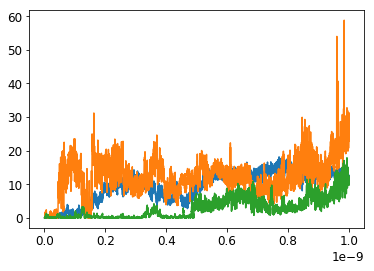

In [548]:
plt.plot(TT,surfactant_com_msd)

In [551]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [553]:
len(running_mean(surfactant_com_msd,10))

14991

In [554]:
def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

In [559]:
len(runningMeanFast(surfactant_com_msd[:,0],10))

5000

In [ ]:
surfa

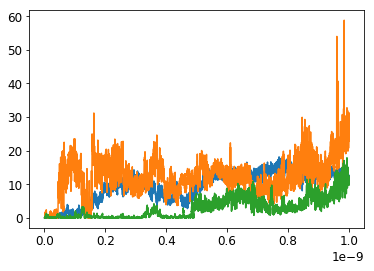

In [563]:
for i in range(3):
    plt.plot(TT,surfactant_com_msd[:,i])

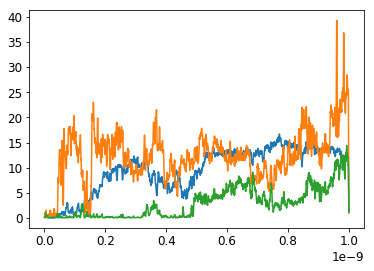

In [565]:
for i in range(3):
    plt.plot(TT,runningMeanFast(surfactant_com_msd[:,i],10))

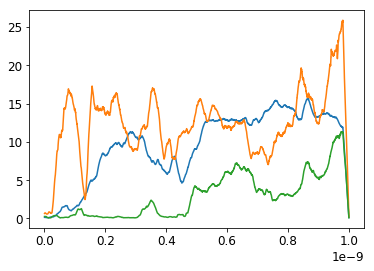

In [566]:
for i in range(3):
    plt.plot(TT,runningMeanFast(surfactant_com_msd[:,i],100))

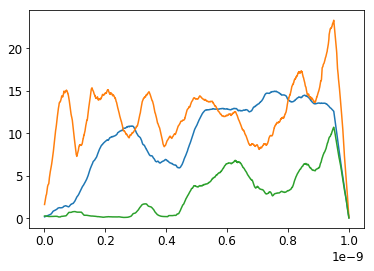

In [571]:
for i in range(3):
    plt.plot(TT,runningMeanFast(surfactant_com_msd[:,i],250))

In [568]:
len(surfactant_com_msd)

5000

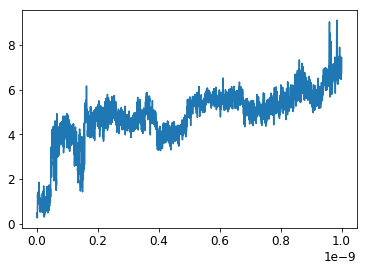

In [574]:
plt.plot(TT,np.sqrt(surfactant_com_msd.sum(axis=1)))

In [580]:
TT

array([  2.00000000e-13,   4.00000000e-13,   6.00000000e-13, ...,
         9.99600000e-10,   9.99800000e-10,   1.00000000e-09])

In [581]:
surfactant_com_Dtwopoint = np.sqrt(surfactant_com_msd.sum(axis=1))/(TT*6)*10e-20

In [582]:
surfactant_com_Dtwopoint

array([  2.55479704e-08,   2.02451533e-08,   1.08870626e-08, ...,
         1.21518366e-10,   1.24167583e-10,   1.11816396e-10])

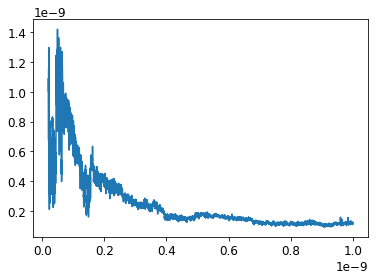

In [584]:
plt.plot(TT[100:],surfactant_com_Dtwopoint[100:])

In [579]:
TT

array([  2.00000000e-13,   4.00000000e-13,   6.00000000e-13, ...,
         9.99600000e-10,   9.99800000e-10,   1.00000000e-09])